# Case de Solução para o Problema do Caixeiro Viajante com Cidades Brasileiras

**Contexto do Problema**

Uma empresa de logística está expandindo suas operações no Brasil e busca otimizar as rotas de transporte entre seus principais centros de distribuição nas capitais estratégicas do país. O objetivo é determinar a rota mais curta para um caminhão de entregas que **parta de uma cidade inicial específica** — neste caso, São Paulo —, percorra todas as outras capitais (pontos de entrega) uma única vez e, ao final, retorne à cidade de origem.

Com o aumento no número de cidades envolvidas, calcular manualmente a rota mais eficiente se torna uma tarefa extremamente demorada. A empresa precisa de uma solução baseada em algoritmos de otimização que permita encontrar essa rota de maneira **rápida e eficiente**, reduzindo custos com combustível, tempo de entrega e desgaste dos veículos.

Esse desafio é um exemplo clássico do Problema do Caixeiro Viajante (TSP - Travelling Salesman Problem), no qual é necessário encontrar a rota mais curta entre um conjunto de cidades, garantindo que o motorista visite cada uma apenas uma vez e retorne ao ponto de partida.


**Objetivo do Projeto**


O projeto tem como principal objetivo implementar uma solução computacional que resolva o problema do caixeiro viajante para 5 cidades principais do Brasil, tendo São Paulo como ponto de Partida, representando centros logísticos de grande relevância para a empresa:

    São Paulo (SP)
    Brasília (DF)
    Rio de Janeiro (RJ)
    Salvador (BA)
    Porto Alegre (RS)

A solução deve calcular a distância entre essas cidades e fornecer a rota mais curta possível que o caminhão deve percorrer, considerando as coordenadas geográficas das cidades. O foco está em otimizar os custos de transporte da empresa ao minimizar a distância percorrida.

**Desafios**

    Otimização de Rota: Encontrar a rota com a distância mais curta entre as cidades exige uma abordagem eficiente, já que o número de possíveis rotas cresce rapidamente com o número de cidades. A solução deve considerar todas as rotas possíveis e retornar a rota com a distância total mais curta.

    Distâncias Reais: A solução precisa calcular as distâncias reais entre as cidades, levando em consideração a curvatura da Terra, para garantir que os resultados sejam precisos.

    Escalabilidade: Embora o problema seja resolvido inicialmente para 5 cidades, a solução deve ser escalável para lidar com mais centros de distribuição no futuro.

**Proposta de Solução**

Duas abordagens serão implementadas no algoritmo: a força bruta, que consiste em testar todas as rotas possíveis e calcular a distância total de cada uma, selecionando ao final a rota mais curta, e o método do vizinho mais próximo, que busca a solução aproximada ao escolher o ponto mais próximo a cada etapa. Com isso, será possível comparar os resultados de ambas as técnicas e avaliar qual delas oferece uma melhor solução para o problema proposto.

**Etapas do Projeto:**

    Coleta de Dados: Utilizar as coordenadas geográficas (latitude e longitude) das cidades escolhidas para calcular as distâncias entre elas.

    Cálculo das Distâncias: Implementar a fórmula de Haversine, que leva em consideração a curvatura da Terra, para calcular a distância real entre duas cidades com base nas suas coordenadas geográficas.

    Algoritmo de Solução:
        Gerar todas as permutações possíveis das cidades (exceto a cidade inicial, que será fixa).
        Para cada permutação, calcular a distância total da rota.
        Retornar a permutação que tiver a menor distância total como a rota mais curta.

    Visualização e Relatório: Apresentar a rota mais curta encontrada pelo algoritmo, incluindo a distância total percorrida e a ordem das cidades a serem visitadas. Se necessário, também poderá ser gerada uma visualização gráfica do percurso.

**Resultados Esperados**

A solução deve apresentar uma rota otimizada, permitindo à empresa de logística:

    Redução de Custos Operacionais: Minimização da quilometragem percorrida e, consequentemente, dos custos com combustível e manutenção.
    Otimização do Tempo de Entrega: A rota mais curta também implica menor tempo nas estradas, melhorando a eficiência da entrega.
    Melhor Alocação de Recursos: Com a rota otimizada, a empresa poderá planejar melhor sua frota de veículos e as equipes envolvidas nas entregas.


Força Bruta - Rota mais curta:
Sao Paulo -> Porto Alegre -> Brasilia -> Salvador -> Rio de Janeiro 
Distância total: 5101.16 km
Tempo total de viagem a 60 km/h: 85.02 horas
Custo total de viagem: R$ 3711.09

Vizinho Mais Próximo - Rota mais curta:
Sao Paulo -> Rio de Janeiro -> Brasilia -> Salvador -> Porto Alegre -> Sao Paulo 
Distância total: 5511.95 km
Tempo total de viagem a 60 km/h: 91.87 horas
Custo total de viagem: R$ 4009.94



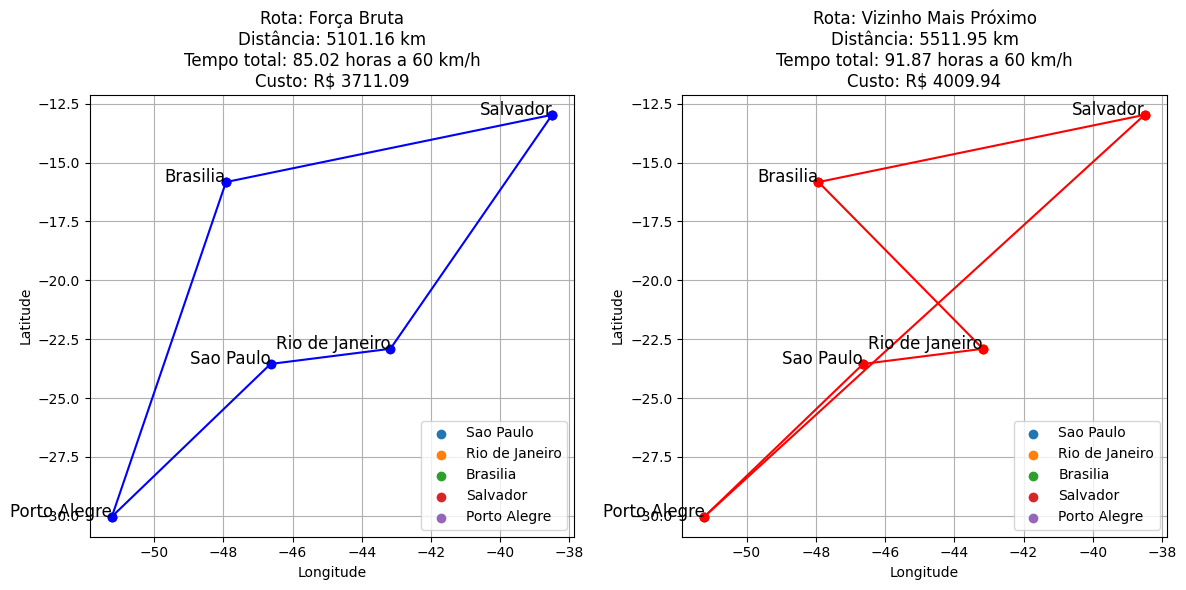

In [ ]:
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import time

# Definindo as coordenadas das cidades
cities = {
    'Sao Paulo': (-23.5505, -46.6333),
    'Rio de Janeiro': (-22.9068, -43.1729),
    'Brasilia': (-15.8267, -47.9218),
    'Salvador': (-12.9714, -38.5014),
    'Porto Alegre': (-30.0346, -51.2177),
}

# Definindo o custo do diesel e o consumo médio do veículo
diesel_cost_per_liter = 5.82  # Custo médio do diesel em R$
vehicle_consumption_km_per_liter = 8  # Consumo médio do veículo em km por litro

# Função para calcular a distância Haversine entre duas cidades
def haversine_distance(city1, city2):
    lat1, lon1 = map(math.radians, cities[city1]) # Acessa as coordenadas da cidade e converte de graus para radianos
    lat2, lon2 = map(math.radians, cities[city2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2 # Calcula a distância angular entre os dois pontos na esfera.
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    R = 6371.0  # Raio da Terra em quilômetros
    return R * c # Retorna a distância entre as duas cidades, em quilômetros

# Função para calcular a distância total de uma rota
def total_distance(route):
    distance = 0
    for i in range(len(route) - 1):
        distance += haversine_distance(route[i], route[i + 1])
    distance += haversine_distance(route[-1], route[0])
    return distance

# Função para calcular o custo total com combustível
def calculate_fuel_cost(total_distance, diesel_cost_per_liter, vehicle_consumption_km_per_liter):
    cost_per_km = diesel_cost_per_liter / vehicle_consumption_km_per_liter
    total_cost = total_distance * cost_per_km
    return total_cost

# Função para encontrar a menor rota usando força bruta
def find_shortest_route_brute_force(cities):
    city_names = list(cities.keys())
    all_routes = itertools.permutations(city_names)

    shortest_route = None
    shortest_distance = float('inf')

    for route in all_routes:
        if route[0] != 'Sao Paulo':  # Garante que São Paulo seja o ponto de partida
            continue
        distance = total_distance(route)
        if distance < shortest_distance:
            shortest_distance = distance
            shortest_route = route

    return shortest_route, shortest_distance

# Função para encontrar a menor rota usando o algoritmo do vizinho mais próximo
def nearest_neighbor(cities):
    city_names = list(cities.keys())
    start_city = 'Sao Paulo'
    unvisited = set(city_names)
    unvisited.remove(start_city)
    route = [start_city]
    total_dist = 0

    current_city = start_city
    while unvisited:
        nearest_city = min(unvisited, key=lambda city: haversine_distance(current_city, city))
        total_dist += haversine_distance(current_city, nearest_city)
        route.append(nearest_city)
        current_city = nearest_city
        unvisited.remove(nearest_city)

    total_dist += haversine_distance(route[-1], start_city)  # Voltar para o ponto inicial
    route.append(start_city)

    return route, total_dist

# Função para simular o tempo de viagem
def simulate_travel_time(route, speed_kmh):
    total_time = 0
    times = []

    for i in range(len(route) - 1):
        distance = haversine_distance(route[i], route[i + 1])
        time_hours = distance / speed_kmh  # Tempo em horas
        total_time += time_hours
        times.append(total_time)

    # Voltar para a cidade inicial
    distance = haversine_distance(route[-1], route[0])
    time_hours = distance / speed_kmh
    total_time += time_hours
    times.append(total_time)

    return times

# Função para plotar os gráficos
def plot_routes(brute_force_route, brute_force_dist, nn_route, nn_dist, brute_force_times, nn_times, speed_kmh, brute_force_cost, nn_cost):
    plt.figure(figsize=(12, 6))

    for idx, (route, dist, times, cost, title, color) in enumerate([
        (brute_force_route, brute_force_dist, brute_force_times, brute_force_cost, 'Força Bruta', 'b-'),
        (nn_route, nn_dist, nn_times, nn_cost, 'Vizinho Mais Próximo', 'r-')
    ]):
        plt.subplot(1, 2, idx+1)
        for city, (lat, lon) in cities.items():
            plt.scatter(lon, lat, label=city)
            plt.text(lon, lat, city, fontsize=12, ha='right')
        for i in range(len(route) - 1):
            city1, city2 = route[i], route[i + 1]
            lat1, lon1 = cities[city1]
            lat2, lon2 = cities[city2]
            plt.plot([lon1, lon2], [lat1, lat2], color, marker='o')
        lat_start, lon_start = cities[route[0]]
        lat_end, lon_end = cities[route[-1]]
        plt.plot([lon_start, lon_end], [lat_start, lat_end], color)
        plt.title(f"Rota: {title}\nDistância: {dist:.2f} km\nTempo total: {times[-1]:.2f} horas a {speed_kmh} km/h\nCusto: R$ {cost:.2f}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.grid(True)
        plt.legend(loc="best")

    plt.tight_layout()
    plt.show()

# Definir a velocidade média (em km/h)
speed_kmh = 60  # 60 km/h

# Calculando as rotas
brute_force_route, brute_force_dist = find_shortest_route_brute_force(cities)
nn_route, nn_dist = nearest_neighbor(cities)

# Simulando o tempo de viagem
brute_force_times = simulate_travel_time(brute_force_route, speed_kmh)
nn_times = simulate_travel_time(nn_route, speed_kmh)

# Calculando o custo da viagem
brute_force_cost = calculate_fuel_cost(brute_force_dist, diesel_cost_per_liter, vehicle_consumption_km_per_liter)
nn_cost = calculate_fuel_cost(nn_dist, diesel_cost_per_liter, vehicle_consumption_km_per_liter)

# Exibindo os resultados
print("Força Bruta - Rota mais curta:")
print(" -> ".join(brute_force_route), f"\nDistância total: {brute_force_dist:.2f} km")
print(f"Tempo total de viagem a {speed_kmh} km/h: {brute_force_times[-1]:.2f} horas")
print(f"Custo total de viagem: R$ {brute_force_cost:.2f}\n")

print("Vizinho Mais Próximo - Rota mais curta:")
print(" -> ".join(nn_route), f"\nDistância total: {nn_dist:.2f} km")
print(f"Tempo total de viagem a {speed_kmh} km/h: {nn_times[-1]:.2f} horas")
print(f"Custo total de viagem: R$ {nn_cost:.2f}\n")

# Gerar os gráficos comparando rotas, tempos e custos
plot_routes(brute_force_route, brute_force_dist, nn_route, nn_dist, brute_force_times, nn_times, speed_kmh, brute_force_cost, nn_cost)


# Conclusão


O projeto busca resolver um problema real e relevante no contexto logístico, aplicando técnicas de otimização combinatória para ajudar a empresa a melhorar sua eficiência operacional. A abordagem de força bruta mostrou-se eficaz para o problema em menor escala, e há potencial para expandir a solução à medida que a empresa cresce, incorporando mais cidades e algoritmos avançados.

Com essa solução, a empresa pode otimizar suas rotas de entrega, reduzindo custos e melhorando a qualidade de seus serviços. A análise comparativa mostrou que o algoritmo de força bruta superou o método do vizinho mais próximo, oferecendo uma solução mais econômica e eficiente. Entre os principais benefícios destacam-se:

- Redução dos custos com combustível e estadias
- Menor distância total percorrida
- Otimização do tempo nas rotas

A utilização do algoritmo proposto pode guiar a empresa na escolha de rotas mais eficientes, mesmo lidando com múltiplos pontos de entrega, permitindo decisões rápidas e precisas sem necessidade de análises demoradas.




Comparando as abordagens do algoritmo de força bruta e o algoritmo do vizinho mais próximo, é possível verificar que o **algoritmo de força bruta obteve um melhor desempenho**, pois encontrou uma solução mais econômica para a empresa, com menor distância total percorrida, em quilômetros, menor tempo total, em horas, e menor custo total, em reais.

O uso do algortimo de força bruta dá um norte para a empresa, entregando uma solução rápida para visualizar quais as melhores opções de rotas, dado o cenário proposto acima.

Para diferentes cenários, a análise de rotas deve ser realizada novamente, visto que com diferentes cidades, ou diferentes restrições, o resultado final será impactado.